In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

import seaborn as sns

from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score



In [2]:
def Format_Test_Data(var_data_file, var_rows_to_load, var_scaler):
    # Load and preprocess the data
    data = pd.read_csv(var_data_file, nrows=var_rows_to_load)
    
    print("original DataFrame:")
    display(data)
    
    # restructure columns here so that label is the last column:
    var_final_dataset_column_list = data.columns.tolist()
    
    # remove the "label" column here and append it at the end of the list:
    var_final_dataset_column_list.remove("label")
    var_final_dataset_column_list.remove("time")
    var_final_dataset_column_list.remove("tonic_entropy")

    var_final_dataset_column_list.remove("acc_x")
    var_final_dataset_column_list.remove("acc_y")
    var_final_dataset_column_list.remove("acc_z")
    var_final_dataset_column_list.remove("seconds")

    
    var_final_dataset_column_list.append("label")
    data = data[var_final_dataset_column_list]
    
    var_final_dataset_column_list_final = var_final_dataset_column_list.copy()
      
    for var_column in var_final_dataset_column_list:
        nan_count = data[var_column].isna().sum()
        if nan_count > 0:
            # drop this column here:
            print("column has NaN:")
            print(var_column,nan_count)
            var_final_dataset_column_list_final.remove(var_column)
            
        inf_count = data[var_column].map(np.isinf).sum()
        #print(inf_count)
        if inf_count > 0:
            # drop this column here:
            print()
            print("column has Inf:")
            print(var_column,inf_count)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
        
        #print(var_column[0:5])
        # remove survey columns here:
        if var_column[0:5] == "PANAS" or var_column[0:4] == "STAI" or var_column[0:4] == "SAM0":
            # drop this column here:
            print()
            print("column has Survey Data:")
            print(var_column)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
            
            
        
    #data.dropna(inplace=True)
    # Remove the first column
    #first_column_name = data.columns[0]
    #data = data.drop(columns=first_column_name)
    
    # remove all columns which have NaN here:
    data = data[var_final_dataset_column_list_final]
    
    data = data[(data['label'] < 5) & (data['label'] > 0)]
    
    data = data.iloc[:,1:]
    
    print("DataFrame (after NaN and Inf removed):")
    display(data)
    print("columns names after removal = ")
    print(data.columns)    
    
    #data.dropna(inplace=True)

    data.to_csv('Capstone_TEST_dataset_for_ml_50ms.csv', index=False)
    
    unique_labels = data['label'].unique()

    # Print the unique values
    print("Unique values in TEST 'label' column:", unique_labels)
    
    var_feature_columns = data.columns[:-1]
    # Difference the DataFrame at the 1-second level (20 rows)
    #data.iloc[:,:-1] = data.iloc[:,:-1].diff(periods=20)
    #data = data.dropna()
    
    X_test = data[var_feature_columns].values
    y_test = data['label'].values


    # Scale the X "Test" features between 0 and 1
    X_test = var_scaler.transform(X_test)
    
    return [X_test,y_test, data.columns]

In [3]:
def Load_StandardTrainTestSplit_Xy(var_data_file, var_rows_to_load, var_test_size=0.2):
    # Load and preprocess the data
    data = pd.read_csv(var_data_file, nrows=var_rows_to_load)
    
    print("original DataFrame:")
    display(data)
    
    # restructure columns here so that label is the last column:
    var_final_dataset_column_list = data.columns.tolist()
    
    # remove the "label" column here and append it at the end of the list:
    var_final_dataset_column_list.remove("label")
    var_final_dataset_column_list.remove("time")
    var_final_dataset_column_list.remove("tonic_entropy")
    
    var_final_dataset_column_list.remove("acc_x")
    var_final_dataset_column_list.remove("acc_y")
    var_final_dataset_column_list.remove("acc_z")
    var_final_dataset_column_list.remove("seconds")

    
    var_final_dataset_column_list.append("label")
    data = data[var_final_dataset_column_list]
    
    var_final_dataset_column_list_final = var_final_dataset_column_list.copy()
      
    for var_column in var_final_dataset_column_list:
        nan_count = data[var_column].isna().sum()
        if nan_count > 0:
            # drop this column here:
            print("column has NaN:")
            print(var_column,nan_count)
            var_final_dataset_column_list_final.remove(var_column)
            
        inf_count = data[var_column].map(np.isinf).sum()
        #print(inf_count)
        if inf_count > 0:
            # drop this column here:
            print()
            print("column has Inf:")
            print(var_column,inf_count)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
        
        #print(var_column[0:5])
        # remove survey columns here:
        if var_column[0:5] == "PANAS" or var_column[0:4] == "STAI" or var_column[0:4] == "SAM0":
            # drop this column here:
            print()
            print("column has Survey Data:")
            print(var_column)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
            
            
        
    #data.dropna(inplace=True)
    # Remove the first column
    #first_column_name = data.columns[0]
    #data = data.drop(columns=first_column_name)
    
    # remove all columns which have NaN here:
    data = data[var_final_dataset_column_list_final]
    
    data = data.iloc[:,2:]
    
    print("DataFrame (after NaN and Inf removed):")
    display(data)
    
    print("columns names after removal = ")
    print(data.columns)
    
    
    #data.dropna(inplace=True)

    data.to_csv('Capstone_final_final_dataset_for_ml_50ms.csv', index=False)
       
    var_feature_columns = data.columns[:-1]
    ## Difference the DataFrame at the 1-second level (20 rows)
    #data.iloc[:,:-1] = data.iloc[:,:-1].diff(periods=20)
    #data = data.dropna()
    
    X = data[var_feature_columns].values
    y = data['label'].values
    
    unique_labels = data['label'].unique()

    # Print the unique values
    print("Unique values in TRAIN 'label' column:", unique_labels)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=var_test_size, random_state=42)
    
    var_print_bool = True
    
    if var_print_bool:
        print("X and y train / test before scale function:")
        var_X_train_df = pd.DataFrame(X_train)
        var_X_test_df = pd.DataFrame(X_test)
        var_y_train_df = pd.DataFrame(y_train)
        var_y_test_df = pd.DataFrame(y_test)
    
        print("var_X_train_df = ")
        display(var_X_train_df)

        print("var_X_test_df = ")
        display(var_X_test_df)

        print("var_y_train_df = ")
        display(var_y_train_df)

        print("var_y_test_df = ")
        display(var_y_test_df)

    # Scale the X "Train" features between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)

    # Scale the X "Test" features between 0 and 1
    X_test = scaler.transform(X_test)
    
    return [(X_train,X_test,y_train,y_test), data, data.columns, scaler]

In [4]:
var_data_file_name = 'Capstone_final_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 100000

#load all:
var_n_rows_to_load = None

var_test_size = .25
var_verbose = True

#X_train,X_test,y_train,y_test = LoadDataXy(var_data_file_name, var_n_rows_to_load, var_verbose)
var_return = Load_StandardTrainTestSplit_Xy(var_data_file_name, var_n_rows_to_load, var_test_size)
X_train,X_test,y_train,y_test = var_return[0]
var_data_df = var_return[1]
var_train_data_df_column_list = var_return[2]

var_scaler_from_training = var_return[3]


original DataFrame:


,Unnamed: 0,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,718272,14,4,1970-01-01 09:58:30.800,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718273,718273,14,4,1970-01-01 09:58:30.850,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718274,718274,14,4,1970-01-01 09:58:30.900,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718275,718275,14,4,1970-01-01 09:58:30.950,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert
column has NaN:
PANAS16_Nervous 15882

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy
column 

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,34.231500,0.204075,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718273,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,34.225349,0.383824,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718274,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,34.226444,0.576782,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718275,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,34.225175,0.762852,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.823874,-0.031754,-0.421886,-0.028857,-0.004609,7.779258,34.686488,-1.441694,35.0,189.0,...,8.935457e+07,18.0,12.607293,7.017837,13.962798,0.0,90.237386,1.372891e+08,25.0,15.627213
1,0.686171,-0.176137,-0.651417,-0.015635,-0.002358,3.863602,34.675119,0.658482,27.0,172.0,...,8.276198e+07,15.0,13.253281,6.568187,14.651572,0.0,90.286567,1.214740e+08,20.0,16.056451
2,0.884206,0.034869,-0.200954,0.214502,-0.004045,6.094219,34.087559,0.670776,26.0,171.0,...,7.709048e+06,8.0,4.697353,2.408458,4.424048,0.0,25.082800,8.864695e+06,11.0,5.037148
3,0.909926,-0.015137,-0.188834,-0.102907,0.002983,16.088311,34.751539,-2.225385,28.0,184.0,...,7.550774e+07,15.0,12.290347,6.713381,13.579708,0.0,74.170867,1.147108e+08,23.0,15.148530
4,0.657629,-0.062880,-0.680754,0.050204,-0.003673,8.199441,34.174420,1.889474,27.0,170.0,...,8.070758e+07,17.0,12.364906,7.309033,13.640020,0.0,74.282612,1.264118e+08,27.0,15.474886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538702,0.507634,-0.036554,-0.814937,-0.014497,-0.002858,6.209041,33.875798,1.832188,27.0,170.0,...,8.048398e+07,17.0,12.187212,7.081926,13.479037,0.0,74.105353,1.256277e+08,28.0,15.226231
538703,0.839880,-0.208983,-0.370137,-0.121494,-0.001687,3.858817,34.802659,1.469727,27.0,172.0,...,7.415268e+07,14.0,12.573071,6.491105,13.967885,0.0,87.607935,1.112821e+08,22.0,15.402475
538704,0.717829,-0.470377,-0.455360,-0.094884,0.004197,1.293302,32.861328,0.755397,25.0,175.0,...,9.464297e+07,21.0,12.269600,7.098145,13.008973,0.0,84.084565,1.380682e+08,31.0,14.819482
538705,0.710257,-0.016869,-0.616806,-0.019596,-0.002587,2.793579,33.766004,0.505676,27.0,180.0,...,6.243388e+06,6.0,4.895820,2.892816,4.950052,0.0,27.981509,8.562244e+06,9.0,5.733359


var_X_test_df = 


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.874943,0.054874,-0.281177,0.184957,-0.005021,3.010810,34.171888,-5.851746,27.0,180.0,...,7.313704e+06,7.0,5.494303,2.746747,5.286377,0.000000,28.147400,8.598508e+06,9.0,5.957382
1,0.900040,-0.041366,-0.198931,-0.025687,-0.004844,11.162687,34.535499,4.606367,28.0,184.0,...,8.619819e+07,17.0,13.031611,6.797210,13.933028,0.000000,88.895349,1.219867e+08,26.0,15.502623
2,0.860760,-0.020137,-0.342943,0.018899,-0.003118,11.491198,34.645361,-5.483268,28.0,184.0,...,7.385922e+07,15.0,12.365002,6.337927,13.735448,0.000000,87.302140,1.105434e+08,22.0,15.127189
3,0.902309,0.099594,0.030417,-0.100126,-0.002370,2.329036,33.544568,1.885594,28.0,181.0,...,7.245746e+06,8.0,4.917166,2.610717,4.723819,0.000000,25.775510,8.729684e+06,11.0,5.397250
4,0.698811,0.003406,-0.627606,-0.306580,-0.003988,8.739253,33.895547,2.677002,27.0,170.0,...,8.110550e+07,17.0,12.289871,6.715708,13.287878,-0.002157,81.715740,1.190308e+08,26.0,14.888533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179565,0.654760,-0.005326,-0.677194,0.125897,-0.002650,1.678194,34.178560,1.000846,26.0,181.0,...,8.258440e+07,12.0,13.871735,6.703957,15.329356,-0.648333,90.447316,1.201405e+08,16.0,16.731174
179566,0.706434,0.022789,-0.618560,-0.127363,-0.003735,0.898209,34.480801,-2.088449,28.0,178.0,...,4.047597e+07,11.0,10.483621,4.290486,10.787292,-0.426806,75.897051,4.963414e+07,17.0,11.609217
179567,0.768497,-0.140931,-0.534423,-0.041965,-0.001454,3.833618,34.997436,-1.863796,27.0,172.0,...,7.323513e+07,13.0,12.608443,6.431154,13.797108,0.000000,84.186448,1.067480e+08,18.0,15.222350
179568,0.425566,0.010509,-0.871149,-0.107145,-0.001649,3.045785,34.833501,-2.692130,26.0,181.0,...,7.241269e+07,11.0,13.494043,6.265050,14.848631,0.000000,84.131588,1.032897e+08,17.0,16.116225


var_y_train_df = 


,0
0,4
1,1
2,1
3,2
4,3
...,...
538702,1
538703,1
538704,1
538705,1


var_y_test_df = 


,0
0,3
1,1
2,4
3,1
4,2
...,...
179565,1
179566,3
179567,1
179568,4


## Display X_train, y_train, X_test, y_test here:

In [5]:
X_train_df = pd.DataFrame(X_train,columns=var_train_data_df_column_list[:-1])
display(X_train_df)
print(X_train_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,0.907736,0.934643,0.824462,0.490760,0.959364,0.382007,0.996882,0.554772,1.0,1.000000,...,0.772907,0.545455,0.671531,0.832664,0.717954,1.0,0.709745,0.814069,0.529412,0.754757
1,0.890899,0.914097,0.793831,0.495171,0.960808,0.189726,0.996845,0.578766,0.2,0.105263,...,0.712021,0.409091,0.724509,0.752666,0.769101,1.0,0.710279,0.714842,0.382353,0.784943
2,0.915113,0.944123,0.853945,0.571942,0.959726,0.299262,0.994942,0.578907,0.1,0.052632,...,0.018869,0.090909,0.022830,0.012597,0.009627,1.0,0.002106,0.008317,0.117647,0.010018
3,0.918258,0.937007,0.855563,0.466058,0.964235,0.790031,0.997092,0.545819,0.3,0.736842,...,0.645025,0.409091,0.645538,0.778498,0.689507,1.0,0.535247,0.672409,0.470588,0.721094
4,0.887409,0.930213,0.789916,0.517134,0.959965,0.402641,0.995224,0.592830,0.2,0.000000,...,0.693048,0.500000,0.651653,0.884472,0.693985,1.0,0.536461,0.745823,0.588235,0.744045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538702,0.869068,0.933959,0.772010,0.495550,0.960488,0.304900,0.994257,0.592176,0.2,0.000000,...,0.690983,0.500000,0.637080,0.844067,0.682031,1.0,0.534536,0.740904,0.617647,0.726559
538703,0.909693,0.909423,0.831368,0.459857,0.961239,0.189491,0.997258,0.588035,0.2,0.105263,...,0.632510,0.363636,0.668725,0.738952,0.718332,1.0,0.681186,0.650897,0.441176,0.738953
538704,0.894769,0.872228,0.819995,0.468734,0.965014,0.063509,0.990971,0.579874,0.0,0.263158,...,0.821748,0.681818,0.643837,0.846952,0.647125,1.0,0.642919,0.818957,0.705882,0.697954
538705,0.893844,0.936761,0.798450,0.493849,0.960662,0.137181,0.993901,0.577021,0.2,0.526316,...,0.005333,0.000000,0.039106,0.098771,0.048687,1.0,0.033588,0.006419,0.058824,0.058978


(538707, 86)


In [6]:
X_test_df = pd.DataFrame(X_test,columns=var_train_data_df_column_list[:-1])
display(X_test_df)
print(X_test_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,0.913980,0.946970,0.843240,0.562086,0.959100,0.147848,0.995215,0.504388,0.2,0.526316,...,0.015218,0.045455,0.088188,0.072783,0.073661,1.000000,0.035390,0.006646,0.058824,0.074733
1,0.917049,0.933275,0.854215,0.491817,0.959213,0.548154,0.996393,0.623870,0.3,0.736842,...,0.743756,0.500000,0.706330,0.793412,0.715744,1.000000,0.695169,0.718059,0.558824,0.745996
2,0.912246,0.936296,0.834997,0.506691,0.960321,0.564285,0.996749,0.508598,0.3,0.736842,...,0.629800,0.409091,0.651661,0.711700,0.701072,1.000000,0.677865,0.646263,0.441176,0.719593
3,0.917326,0.953333,0.884821,0.466985,0.960801,0.114369,0.993184,0.592786,0.3,0.578947,...,0.014590,0.090909,0.040857,0.048582,0.031887,1.000000,0.009629,0.007470,0.117647,0.035342
4,0.892444,0.939646,0.797009,0.398114,0.959763,0.429149,0.994320,0.601828,0.2,0.000000,...,0.696723,0.500000,0.645499,0.778912,0.667836,0.999369,0.617192,0.699514,0.558824,0.702810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179565,0.887058,0.938403,0.790392,0.542384,0.960621,0.082409,0.995237,0.582678,0.1,0.578947,...,0.710381,0.272727,0.775229,0.776821,0.819432,0.810449,0.712025,0.706476,0.264706,0.832393
179566,0.893376,0.942404,0.798216,0.457899,0.959925,0.044107,0.996216,0.547383,0.3,0.421053,...,0.321488,0.227273,0.497367,0.347434,0.482148,0.875216,0.553995,0.264110,0.294118,0.472194
179567,0.900965,0.919107,0.809444,0.486387,0.961388,0.188253,0.997889,0.549950,0.2,0.105263,...,0.624036,0.318182,0.671625,0.728286,0.705650,1.000000,0.644026,0.622450,0.323529,0.726286
179568,0.859034,0.940656,0.764509,0.464644,0.961263,0.149566,0.997358,0.540486,0.1,0.578947,...,0.616440,0.227273,0.744254,0.698734,0.783734,1.000000,0.643430,0.600752,0.294118,0.789147


(179570, 86)


In [7]:
display(y_train)
print(y_train.shape)

array([4, 1, 1, ..., 1, 1, 1], dtype=int64)

(538707,)


In [8]:
display(y_test)
print(y_test.shape)

array([3, 1, 4, ..., 1, 4, 2], dtype=int64)

(179570,)


## Run Dummy Classification with the most frequent class strategy here:

In [9]:

# Create the dummy classifier with the most frequent class strategy
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the classifier to the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

var_train_score = dummy_clf.score(X_train, y_train)
var_test_score = dummy_clf.score(X_test, y_test)
print("Training set score: {:.3f}".format(var_train_score))
print("Validation set score: {:.3f}".format(var_test_score))


              precision    recall  f1-score   support

           1       0.39      1.00      0.56     70042
           2       0.00      0.00      0.00     39466
           3       0.00      0.00      0.00     22508
           4       0.00      0.00      0.00     47554

    accuracy                           0.39    179570
   macro avg       0.10      0.25      0.14    179570
weighted avg       0.15      0.39      0.22    179570

Training set score: 0.393
Validation set score: 0.390


C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# print f1 scores here:

macro_f1_score = f1_score(y_test, y_pred, average='macro')
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')
micro_f1_score = f1_score(y_test, y_pred, average='micro')

print("Macro F1 score: {:.3f}".format(macro_f1_score))
print("Weighted F1 score: {:.3f}".format(weighted_f1_score))
print("Micro F1 score: {:.3f}".format(micro_f1_score))

Macro F1 score: 0.140
Weighted F1 score: 0.219
Micro F1 score: 0.390


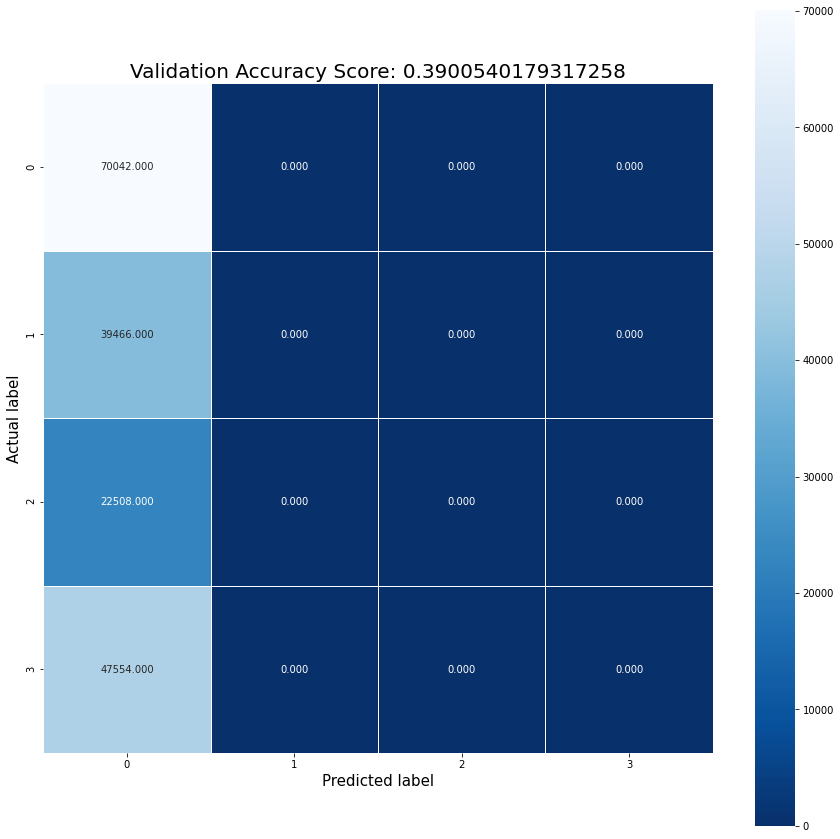

In [11]:
# Calculate the confusion matrix
var_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(var_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
all_sample_title = 'Validation Accuracy Score: {0}'.format(var_test_score)
plt.title(all_sample_title, size = 20)
plt.show()



## Train on 100% of TRAIN dataset here:

In [12]:
var_data_file_name = 'Capstone_final_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 100000

#load all:
var_n_rows_to_load = None

var_test_size = 0.00001
var_verbose = True


var_return = Load_StandardTrainTestSplit_Xy(var_data_file_name, var_n_rows_to_load, var_test_size)
X_train,X_test,y_train,y_test = var_return[0]
var_data_df = var_return[1]
var_train_data_df_column_list = var_return[2]

var_scaler_from_training = var_return[3]

original DataFrame:


,Unnamed: 0,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,718272,14,4,1970-01-01 09:58:30.800,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718273,718273,14,4,1970-01-01 09:58:30.850,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718274,718274,14,4,1970-01-01 09:58:30.900,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718275,718275,14,4,1970-01-01 09:58:30.950,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert
column has NaN:
PANAS16_Nervous 15882

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy
column 

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,34.231500,0.204075,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718273,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,34.225349,0.383824,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718274,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,34.226444,0.576782,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718275,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,34.225175,0.762852,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.737097,-0.034229,-0.590469,-0.032734,-0.002119,2.694800,34.958601,1.872384,26.0,181.0,...,8.093143e+07,12.0,14.178625,6.585845,15.299392,0.000000,90.036102,1.116929e+08,18.0,16.656673
1,0.888200,-0.002531,-0.226040,-0.230362,-0.003535,7.107904,32.901865,3.231724,27.0,173.0,...,1.096041e+08,24.0,13.023800,7.514739,13.849201,0.000000,90.377449,1.604275e+08,35.0,15.756639
2,0.839046,-0.042657,-0.391274,-0.006350,-0.003452,7.026247,30.831526,-1.113150,27.0,173.0,...,1.037944e+08,25.0,12.401513,7.594317,13.089523,0.000000,74.173671,1.545531e+08,38.0,15.133052
3,0.832011,-0.016131,-0.411646,0.026123,-0.004483,2.049550,33.914093,0.957380,26.0,181.0,...,7.402242e+07,12.0,13.058649,6.595011,14.517785,-0.163305,87.769043,1.103685e+08,18.0,15.945540
4,0.716686,-0.466983,-0.461771,-0.040659,-0.003072,1.282501,32.850839,2.074759,25.0,175.0,...,9.617799e+07,21.0,12.354951,7.331430,13.281637,0.000000,87.570555,1.450133e+08,31.0,15.170753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718264,0.507634,-0.036554,-0.814937,-0.014497,-0.002858,6.209041,33.875798,1.832188,27.0,170.0,...,8.048398e+07,17.0,12.187212,7.081926,13.479037,0.000000,74.105353,1.256277e+08,28.0,15.226231
718265,0.839880,-0.208983,-0.370137,-0.121494,-0.001687,3.858817,34.802659,1.469727,27.0,172.0,...,7.415268e+07,14.0,12.573071,6.491105,13.967885,0.000000,87.607935,1.112821e+08,22.0,15.402475
718266,0.717829,-0.470377,-0.455360,-0.094884,0.004197,1.293302,32.861328,0.755397,25.0,175.0,...,9.464297e+07,21.0,12.269600,7.098145,13.008973,0.000000,84.084565,1.380682e+08,31.0,14.819482
718267,0.710257,-0.016869,-0.616806,-0.019596,-0.002587,2.793579,33.766004,0.505676,27.0,180.0,...,6.243388e+06,6.0,4.895820,2.892816,4.950052,0.000000,27.981509,8.562244e+06,9.0,5.733359


var_X_test_df = 


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.874943,0.054874,-0.281177,0.184957,-0.005021,3.010810,34.171888,-5.851746,27.0,180.0,...,7.313704e+06,7.0,5.494303,2.746747,5.286377,0.000000,28.147400,8.598508e+06,9.0,5.957382
1,0.900040,-0.041366,-0.198931,-0.025687,-0.004844,11.162687,34.535499,4.606367,28.0,184.0,...,8.619819e+07,17.0,13.031611,6.797210,13.933028,0.000000,88.895349,1.219867e+08,26.0,15.502623
2,0.860760,-0.020137,-0.342943,0.018899,-0.003118,11.491198,34.645361,-5.483268,28.0,184.0,...,7.385922e+07,15.0,12.365002,6.337927,13.735448,0.000000,87.302140,1.105434e+08,22.0,15.127189
3,0.902309,0.099594,0.030417,-0.100126,-0.002370,2.329036,33.544568,1.885594,28.0,181.0,...,7.245746e+06,8.0,4.917166,2.610717,4.723819,0.000000,25.775510,8.729684e+06,11.0,5.397250
4,0.698811,0.003406,-0.627606,-0.306580,-0.003988,8.739253,33.895547,2.677002,27.0,170.0,...,8.110550e+07,17.0,12.289871,6.715708,13.287878,-0.002157,81.715740,1.190308e+08,26.0,14.888533
5,0.873657,0.047154,-0.171497,0.078619,-0.002724,6.744657,34.561036,-6.915763,26.0,171.0,...,8.299195e+06,9.0,4.990170,2.576823,4.701262,0.000000,28.150168,9.579009e+06,14.0,5.361146
6,0.886909,-0.025291,-0.263926,-0.058790,0.002189,16.939784,34.886579,-1.526446,28.0,184.0,...,7.082133e+07,15.0,11.927917,6.649429,13.173156,0.000000,82.046445,1.083894e+08,25.0,14.756251
7,0.708451,-0.022291,-0.617571,0.100142,-0.001505,2.811018,33.680355,3.233555,27.0,180.0,...,6.680979e+06,6.0,5.050930,2.923623,5.183123,0.000000,30.043019,9.273675e+06,11.0,5.950826


var_y_train_df = 


,0
0,4
1,4
2,1
3,1
4,1
...,...
718264,1
718265,1
718266,1
718267,1


var_y_test_df = 


,0
0,3
1,1
2,4
3,1
4,2
5,2
6,2
7,1


## Run Dummy Classification with the most frequent class strategy on FINAL Test set here:

In [13]:

# Create the dummy classifier with the most frequent class strategy
var_model = DummyClassifier(strategy='most_frequent')

# Fit the classifier to the training data
var_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [14]:
X_train_df = pd.DataFrame(X_train,columns=var_train_data_df_column_list[:-1])
display(X_train_df)
print(X_train_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,0.897125,0.934290,0.801965,0.489467,0.960962,0.132329,0.997752,0.591893,0.1,0.578947,...,0.695115,0.272727,0.800398,0.755808,0.817207,1.000000,0.707559,0.653474,0.323529,0.827153
1,0.915601,0.938801,0.850598,0.423540,0.960053,0.349037,0.991091,0.607404,0.2,0.157895,...,0.959922,0.818182,0.705689,0.921070,0.709519,1.000000,0.711266,0.959242,0.823529,0.763859
2,0.909591,0.933091,0.828547,0.498268,0.960107,0.345027,0.984387,0.557827,0.2,0.157895,...,0.906266,0.863636,0.654655,0.935228,0.653107,1.000000,0.535278,0.922385,0.911765,0.720006
3,0.908731,0.936866,0.825829,0.509101,0.959445,0.100644,0.994369,0.581453,0.1,0.578947,...,0.631307,0.272727,0.708547,0.757438,0.759166,0.952255,0.682936,0.645165,0.323529,0.777143
4,0.894630,0.872711,0.819139,0.486823,0.960350,0.062978,0.990926,0.594202,0.0,0.263158,...,0.835925,0.681818,0.650836,0.888457,0.667373,1.000000,0.680780,0.862531,0.705882,0.722657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718264,0.869068,0.933959,0.772010,0.495550,0.960488,0.304898,0.994245,0.591435,0.2,0.000000,...,0.690983,0.500000,0.637080,0.844067,0.682031,1.000000,0.534536,0.740904,0.617647,0.726559
718265,0.909693,0.909423,0.831368,0.459857,0.961239,0.189489,0.997247,0.587299,0.2,0.105263,...,0.632510,0.363636,0.668725,0.738952,0.718332,1.000000,0.681186,0.650897,0.441176,0.738953
718266,0.894769,0.872228,0.819995,0.468734,0.965014,0.063508,0.990960,0.579148,0.0,0.263158,...,0.821748,0.681818,0.643837,0.846952,0.647125,1.000000,0.642919,0.818957,0.705882,0.697954
718267,0.893844,0.936761,0.798450,0.493849,0.960662,0.137180,0.993890,0.576298,0.2,0.526316,...,0.005333,0.000000,0.039106,0.098771,0.048687,1.000000,0.033588,0.006419,0.058824,0.058978


(718269, 86)


## Load final TEST set here:

In [15]:
var_data_file_name = 'Capstone_final_TEST_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 1000

#load all:
var_n_rows_to_load = None

var_verbose = True

#X_train,X_test,y_train,y_test = LoadDataXy(var_data_file_name, var_n_rows_to_load, var_verbose)
var_return = Format_Test_Data(var_data_file_name, var_n_rows_to_load, var_scaler_from_training)

original DataFrame:


,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,15,1,1970-01-01 00:00:00.000,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
1,15,1,1970-01-01 00:00:00.050,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
2,15,1,1970-01-01 00:00:00.100,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
3,15,1,1970-01-01 00:00:00.150,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
4,15,1,1970-01-01 00:00:00.200,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180944,17,4,1970-01-01 02:30:46.750,0.489731,-0.003503,-0.830869,-0.200391,-0.004282,7.028656,34.077069,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180945,17,4,1970-01-01 02:30:46.800,0.486531,-0.004200,-0.832280,-0.117299,-0.003047,7.025888,34.078118,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180946,17,4,1970-01-01 02:30:46.850,0.484634,-0.002354,-0.830251,-0.023418,-0.002673,7.024678,34.074848,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180947,17,4,1970-01-01 02:30:46.900,0.486080,-0.007046,-0.823200,0.182867,-0.004349,7.023141,34.072500,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy

column has Survey Data:
PANAS24_Angry
column

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,-2.146432,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
1,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,-2.245135,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
2,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,-2.340611,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
3,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,-2.403085,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
4,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,-2.420306,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180944,0.489731,-0.003503,-0.830869,-0.200391,-0.004282,7.028656,34.077069,13.653608,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180945,0.486531,-0.004200,-0.832280,-0.117299,-0.003047,7.025888,34.078118,13.842294,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180946,0.484634,-0.002354,-0.830251,-0.023418,-0.002673,7.024678,34.074848,14.038217,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180947,0.486080,-0.007046,-0.823200,0.182867,-0.004349,7.023141,34.072500,14.165998,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

In [16]:
var_X_TEST_held_out = var_return[0]
var_y_TEST_held_out = var_return[1]

var_test_data_df_column_list = var_return[2]

In [17]:
print(var_train_data_df_column_list)
print(len(var_train_data_df_column_list))
print(var_test_data_df_column_list)
print(len(var_test_data_df_column_list))

Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_mean', 'tonic_std', 'tonic_min', 

In [18]:
var_X_TEST_held_out_df = pd.DataFrame(var_X_TEST_held_out,columns=var_train_data_df_column_list[:-1])
display(var_X_TEST_held_out_df)
print(var_X_TEST_held_out_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,0.917876,0.949420,0.866942,0.449254,0.959969,0.069863,0.993114,0.546036,0.3,0.842105,...,-0.012621,0.045455,0.037353,0.209483,0.000016,1.0,-0.081758,-0.012335,0.117647,0.046066
1,0.917071,0.948568,0.866615,0.502873,0.958709,0.069932,0.993109,0.544910,0.3,0.842105,...,-0.012621,0.045455,0.037353,0.209483,0.000016,1.0,-0.081758,-0.012335,0.117647,0.046066
2,0.917445,0.948005,0.867448,0.498206,0.962454,0.069824,0.993125,0.543821,0.3,0.842105,...,-0.012621,0.045455,0.037353,0.209483,0.000016,1.0,-0.081758,-0.012335,0.117647,0.046066
3,0.917578,0.948430,0.866945,0.500855,0.961861,0.069757,0.993128,0.543108,0.3,0.842105,...,-0.012621,0.045455,0.037353,0.209483,0.000016,1.0,-0.081758,-0.012335,0.117647,0.046066
4,0.917470,0.949545,0.868220,0.509275,0.960106,0.069967,0.993138,0.542911,0.3,0.842105,...,-0.012621,0.045455,0.037353,0.209483,0.000016,1.0,-0.081758,-0.012335,0.117647,0.046066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180944,0.866879,0.938663,0.769884,0.433538,0.959574,0.345145,0.994897,0.726324,0.4,-0.263158,...,-0.052328,-0.272727,-0.362405,-0.415898,-0.318894,1.0,-0.270317,-0.047302,-0.205882,-0.344216
180945,0.866488,0.938563,0.769696,0.461257,0.960366,0.345009,0.994900,0.728477,0.4,-0.263158,...,-0.052328,-0.272727,-0.362405,-0.415898,-0.318894,1.0,-0.270317,-0.047302,-0.205882,-0.344216
180946,0.866256,0.938826,0.769966,0.492574,0.960606,0.344950,0.994890,0.730712,0.4,-0.263158,...,-0.052328,-0.272727,-0.362405,-0.415898,-0.318894,1.0,-0.270317,-0.047302,-0.205882,-0.344216
180947,0.866433,0.938158,0.770907,0.561389,0.959531,0.344875,0.994882,0.732170,0.4,-0.263158,...,-0.052328,-0.272727,-0.362405,-0.415898,-0.318894,1.0,-0.270317,-0.047302,-0.205882,-0.344216


(180949, 86)


In [19]:
display(var_y_TEST_held_out)
print(var_y_TEST_held_out.shape)

array([1, 1, 1, ..., 4, 4, 4], dtype=int64)

(180949,)


In [20]:
# Make predictions on the test data
y_TEST_pred = var_model.predict(var_X_TEST_held_out)

print(np.unique(var_y_TEST_held_out))
print(np.unique(y_TEST_pred))

# Evaluate the model
accuracy = accuracy_score(var_y_TEST_held_out, y_TEST_pred)
print("Accuracy: ", accuracy)

# Classification report
print("Classification Report:\n", classification_report(var_y_TEST_held_out, y_TEST_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(var_y_TEST_held_out, y_TEST_pred))

[1 2 3 4]
[1]
Accuracy:  0.390839407788935
Classification Report:
               precision    recall  f1-score   support

           1       0.39      1.00      0.56     70722
           2       0.00      0.00      0.00     41642
           3       0.00      0.00      0.00     22242
           4       0.00      0.00      0.00     46343

    accuracy                           0.39    180949
   macro avg       0.10      0.25      0.14    180949
weighted avg       0.15      0.39      0.22    180949

Confusion Matrix:
 [[70722     0     0     0]
 [41642     0     0     0]
 [22242     0     0     0]
 [46343     0     0     0]]


C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plebl\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# print f1 scores here:

macro_f1_score = f1_score(var_y_TEST_held_out, y_TEST_pred, average='macro')
weighted_f1_score = f1_score(var_y_TEST_held_out, y_TEST_pred, average='weighted')
micro_f1_score = f1_score(var_y_TEST_held_out, y_TEST_pred, average='micro')

print("Macro F1 score: {:.3f}".format(macro_f1_score))
print("Weighted F1 score: {:.3f}".format(weighted_f1_score))
print("Micro F1 score: {:.3f}".format(micro_f1_score))

Macro F1 score: 0.141
Weighted F1 score: 0.220
Micro F1 score: 0.391


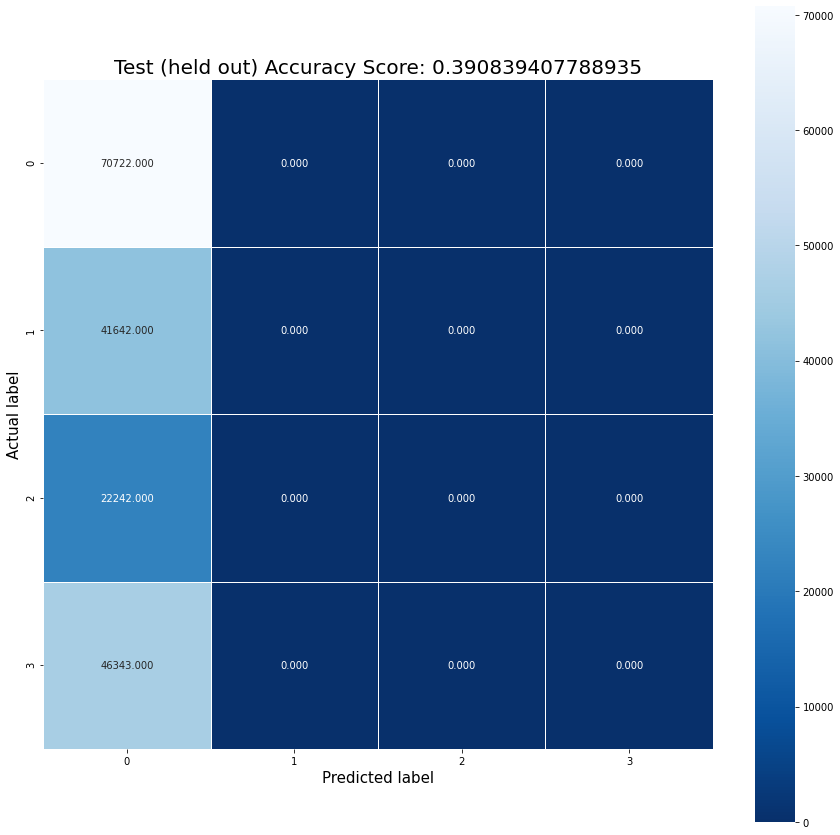

In [22]:
# Calculate the confusion matrix
cm = confusion_matrix(var_y_TEST_held_out, y_TEST_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
#cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
#fig, ax = plt.subplots(figsize=(17, 17))  # Set the desired figure size (width, height) in inches
#cm_display.plot(ax=ax)  # Pass the axes object to the plot method
#plt.title('Confusion Matrix')
#plt.show()

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
all_sample_title = 'Test (held out) Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 20)
plt.show()


In [23]:
print(var_train_data_df_column_list)
print(len(var_train_data_df_column_list))
print(var_test_data_df_column_list)
print(len(var_test_data_df_column_list))

Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_mean', 'tonic_std', 'tonic_min', 

In [24]:
display(var_model)

DummyClassifier(strategy='most_frequent')

In [25]:
print("Hyperparameters: ", var_model.get_params())

Hyperparameters:  {'constant': None, 'random_state': None, 'strategy': 'most_frequent'}


## Display label frequency counts here:

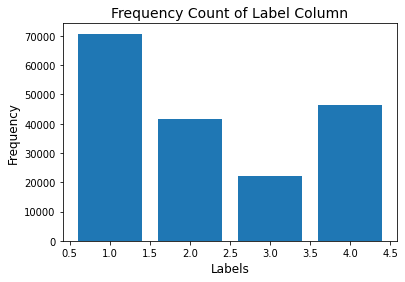

In [26]:

# Calculate the frequency count of the 'label' column
unique_labels, counts = np.unique(var_y_TEST_held_out, return_counts=True)

# Create a bar plot of the frequency count
plt.bar(unique_labels, counts)

# Set the labels and title
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Count of Label Column', fontsize=14)

# Show the plot
plt.show()


## Calculate manually the percentage of label=1 within the held out dataset here:

In [27]:
label_1_count = np.count_nonzero(var_y_TEST_held_out == 1)
total_count = var_y_TEST_held_out.size
percentage_label_1 = (label_1_count / total_count) * 100

print(f"Percentage of label '1': {percentage_label_1:.2f}%")

Percentage of label '1': 39.08%
